#**Rendu du projet sur la détection de contours et la reconnaissance de chiffres manuscrits**

Groupe composé des membres suivants :
- Maha EL BADRI
- Fatima-Zahra LAMOUDNI
- Eléonore MAYER
- Noé MERSNI
- Mathilde RAMSAMY--AGEORGES
- Marwa TOURABI

**ING2 GM Apprentis**



Dans ce projet, nous allons réaliser une détection de chiffres manuscrits par deux méthodes de détection : **la méthode du Gradient avec le filtre de Sobel** et **l'approche Laplacien**.

Après cela, nous appliquerons un algorithme de reconnaissance de chiffres manuscrits aux détections de contours des deux méthodes.

---



**Hypothèse : À travers la reconnaissance de chiffres manuscrits nous pouvons savoir quelle méthode de détection de contours est la meilleure entre la méthode du Gradient avec le filtre de Sobel et l'approche Laplacien.**

In [1]:
! rm -rf ./Handwritten-number-detection

'rm' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.


In [2]:
! git clone https://github.com/mrwtrbi/Handwritten-number-detection.git

Cloning into 'Handwritten-number-detection'...


In [3]:
! pip install opencv-python

'pip' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.


In [4]:
# Import des librairies nécessaires
import cv2
import matplotlib.pyplot as plt
import numpy as np

ModuleNotFoundError: No module named 'cv2'

##**Affichage des images**

In [5]:
# Chargement de l'image
img = cv2.imread("./Handwritten-number-detection/Chiffres_manuscrits.jpg")

# Conversion de l'image en noir et blanc
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Affichage de l'image originale et en noir et blanc
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.imshow(img)
ax1.set_title("Image originale")
ax2.imshow(gray_img, cmap="gray")
ax2.set_title("Image en noir et blanc")
plt.show()

NameError: name 'cv2' is not defined

##**1) Détection de contours**

Nous avons sélectionné six chiffres atypiques de notre base.

In [ ]:
# Import des images
marwa_3 = plt.imread("./Handwritten-number-detection/Edges_to_detect/3_Marwa.jpg")
eleonore_4 = plt.imread("./Handwritten-number-detection/Edges_to_detect/4_Eléonore.jpg")
noe_5 = plt.imread("./Handwritten-number-detection/Edges_to_detect/5_Noé.jpg")
maha_7 = plt.imread("./Handwritten-number-detection/Edges_to_detect/7_Maha.jpg")
noe_8 = plt.imread("./Handwritten-number-detection/Edges_to_detect/8_Noé.jpg")
mathilde_9 = plt.imread("./Handwritten-number-detection/Edges_to_detect/9_Mathilde.jpg")

imgs = {"marwa_3" : marwa_3,"eleonore_4" : eleonore_4,"noe_5" : noe_5,"maha_7" : maha_7,"noe_8" : noe_8,"mathilde_9": mathilde_9}

###**A) Méthode du gradient**

In [ ]:
# Fonction permettant d'optimiser l'affichage des subplots pour le Gradient
def show_subplot_sobel(image, label, number):
  plt.subplot(1, 4, number), plt.imshow(image, cmap="gray")
  plt.title(f"{label}"), plt.xticks([]), plt.yticks([])

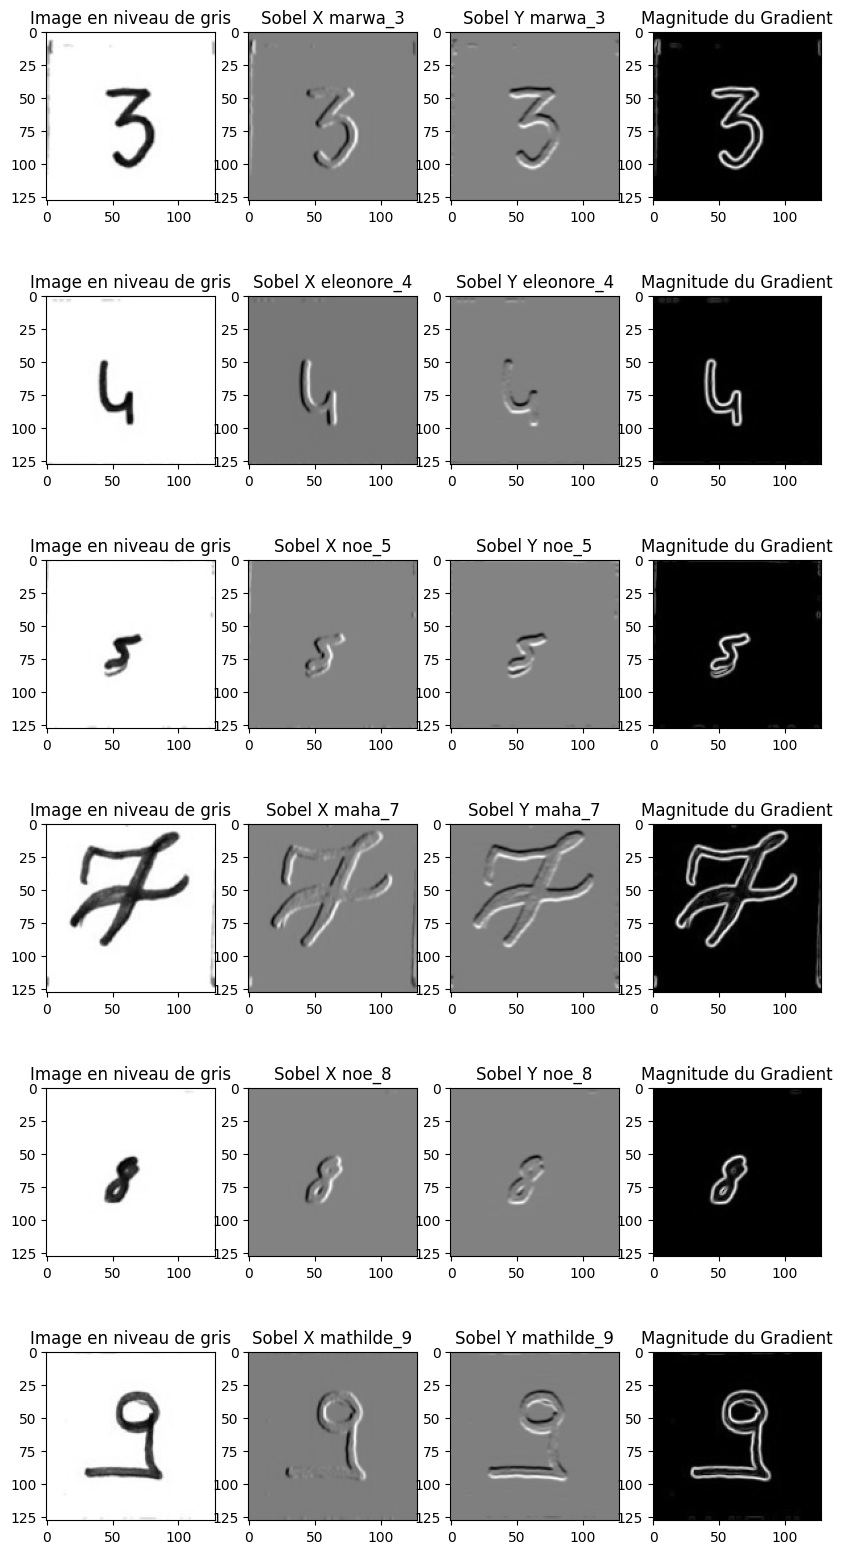

In [ ]:
# Application de la méthode du gradient avec le filtre de Sobel sur notre sélection
fig, axes = plt.subplots(6, 4, figsize=(10, 20))

i = 0
for title in imgs.keys():
    gray_img = cv2.cvtColor(imgs[title], cv2.COLOR_BGR2GRAY)
    sobel_x = cv2.Sobel(gray_img, cv2.CV_64F, 1, 0, 5)
    sobel_y = cv2.Sobel(gray_img, cv2.CV_64F, 0, 1, 5)

    # Calcul de la magnitude et de la direction du gradient
    mag, dir = cv2.cartToPolar(sobel_x, sobel_y, angleInDegrees=True)

    axes[i, 0].imshow(gray_img, cmap="gray")
    axes[i, 0].set_title("Image en niveau de gris")

    axes[i, 1].imshow(sobel_x, cmap="gray")
    axes[i, 1].set_title(f"Sobel X {title}")

    axes[i, 2].imshow(sobel_y, cmap="gray")
    axes[i, 2].set_title(f"Sobel Y {title}")

    axes[i, 3].imshow(mag, cmap="gray")
    axes[i, 3].set_title("Magnitude du Gradient")

    i += 1

# Afficher la figure une seule fois après la boucle
plt.show()

###**B) Approche Laplacien**

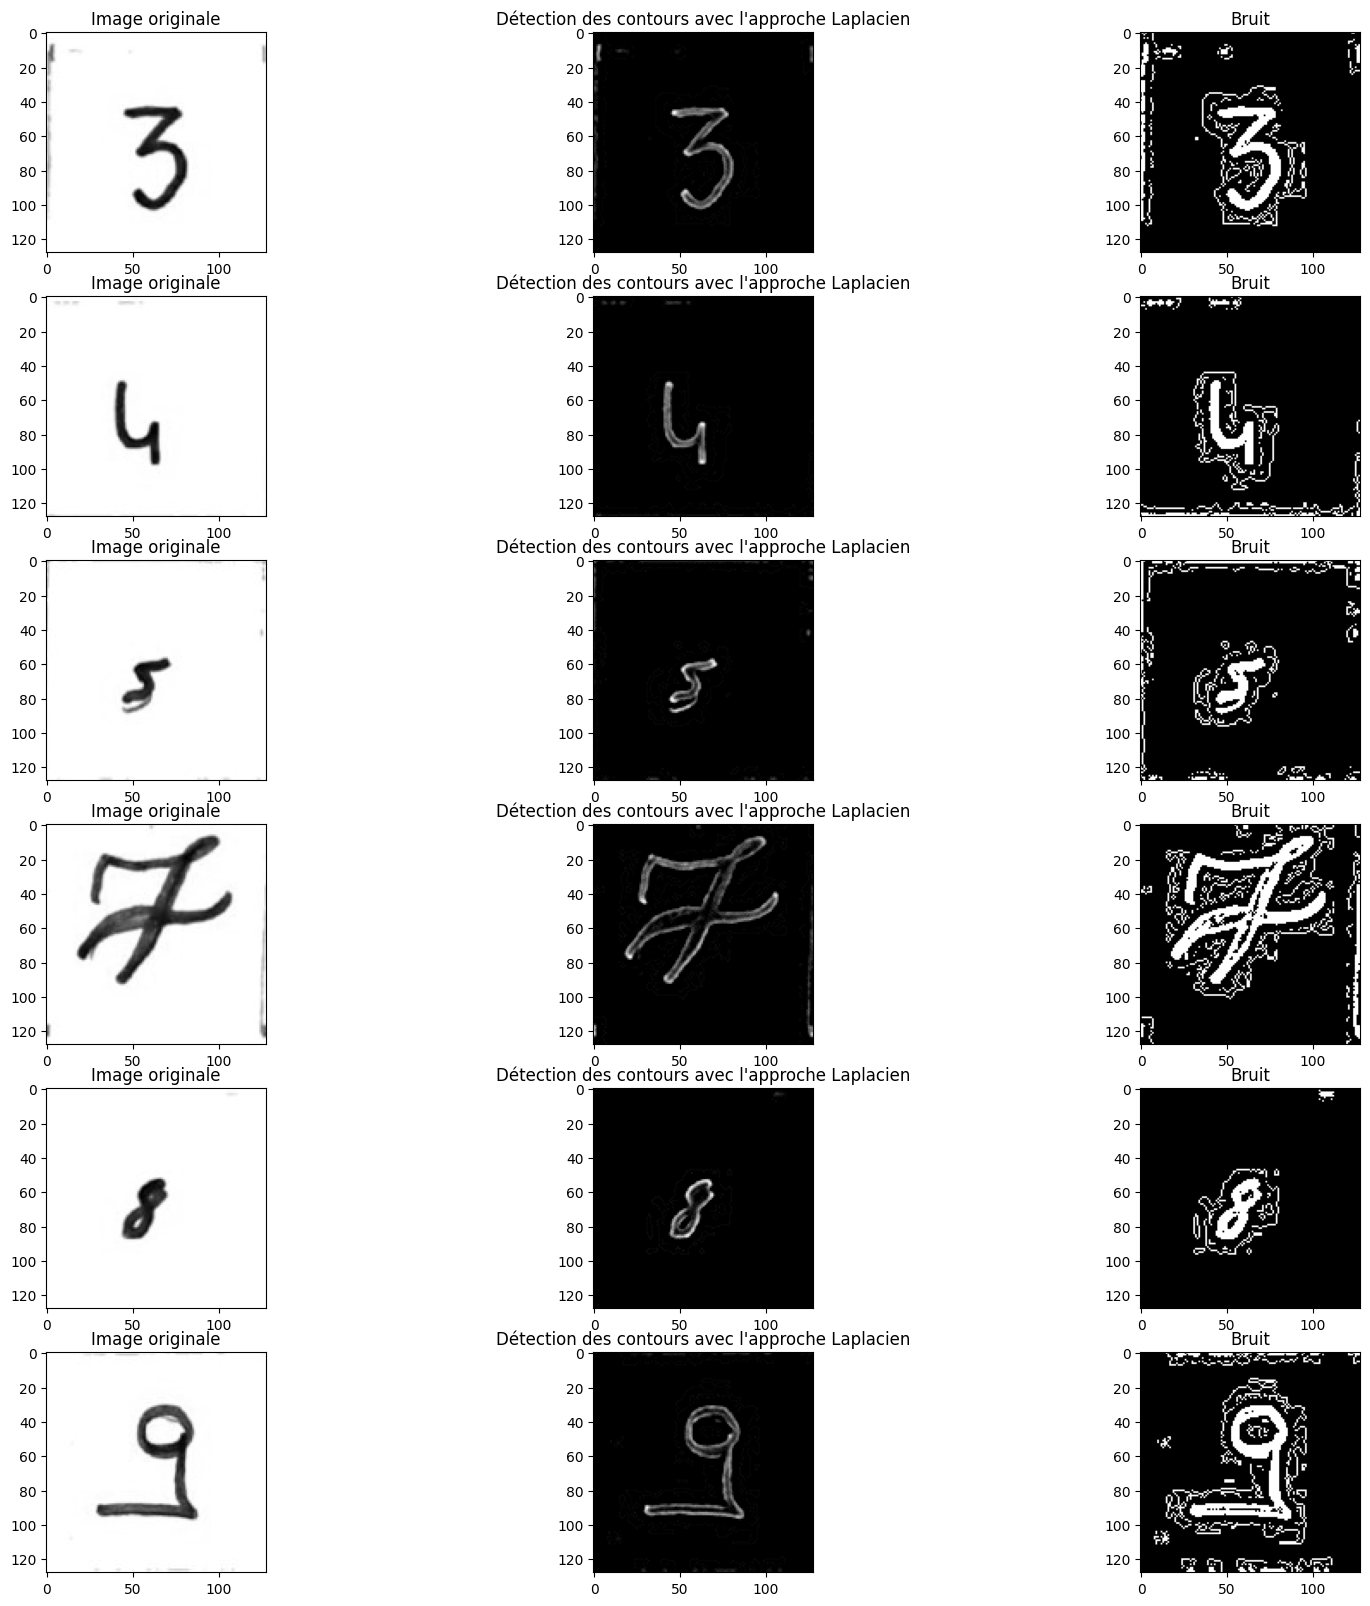

In [ ]:
# Application du filtre de l'approche Laplacien sur notre sélection
fig, ax = plt.subplots(6, 3, figsize=(20,20))
i = 0
for title in imgs.keys():
  gray_img = cv2.cvtColor(imgs[title], cv2.COLOR_BGR2GRAY)
  img_smooth = cv2.GaussianBlur(gray_img, (5, 5), 0)

  # Application de l'opérateur Laplacien
  laplacian = cv2.Laplacian(img_smooth, cv2.CV_64F)

  # Seuil de l'image
  threshold = 0.1 # Impact sur la détection
  laplacian[laplacian<threshold] = 0 # Impact sur le bruit
  edges = cv2.threshold(np.abs(laplacian), threshold, 255, cv2.THRESH_BINARY)[1]

  # Affichage de la détection de contour avec l'approche Laplacien

  ax[i,0].imshow(gray_img, cmap="gray")
  ax[i,0].set_title("Image originale")
  ax[i,1].imshow(np.abs(laplacian), cmap="gray")
  ax[i,1].set_title("Détection des contours avec l'approche Laplacien")
  ax[i,2].imshow(edges, cmap="gray")
  ax[i,2].set_title("Bruit")

  i+=1

plt.show()

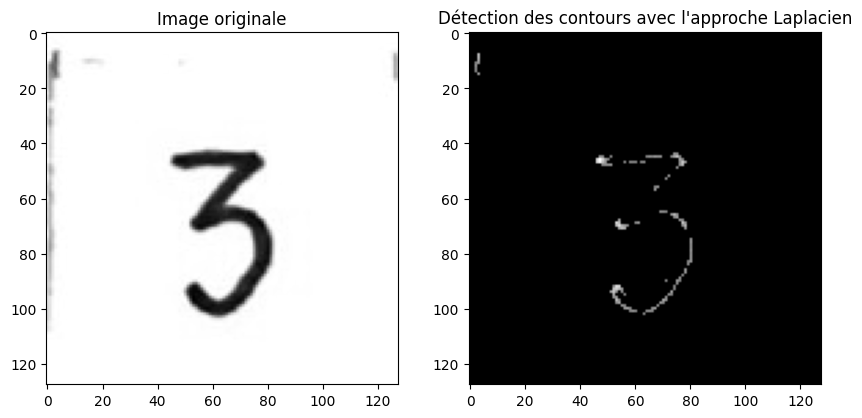

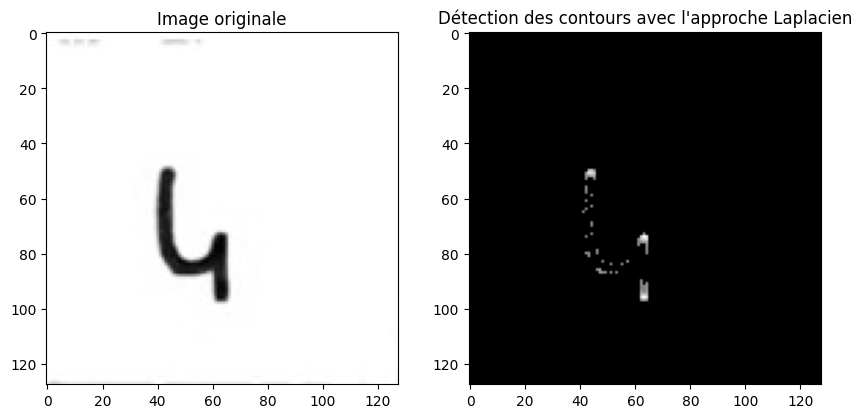

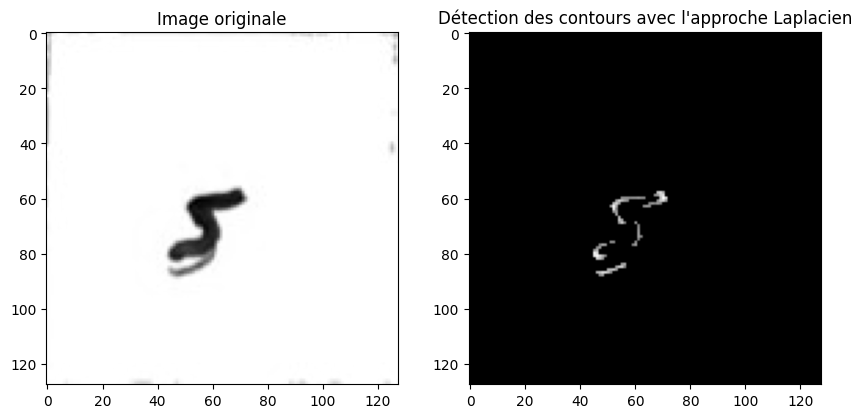

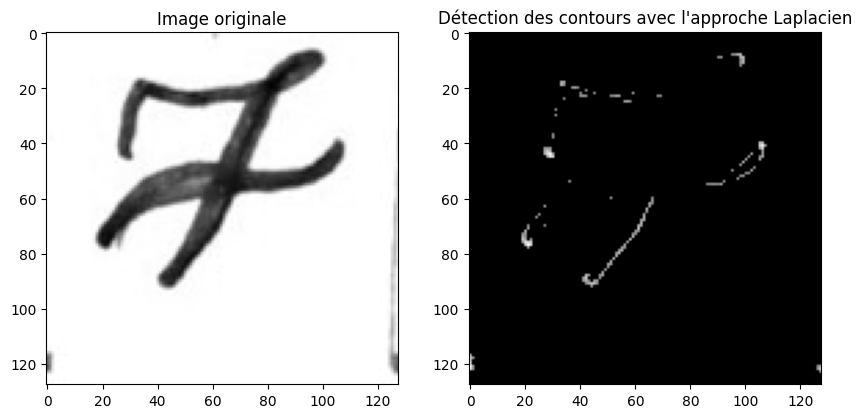

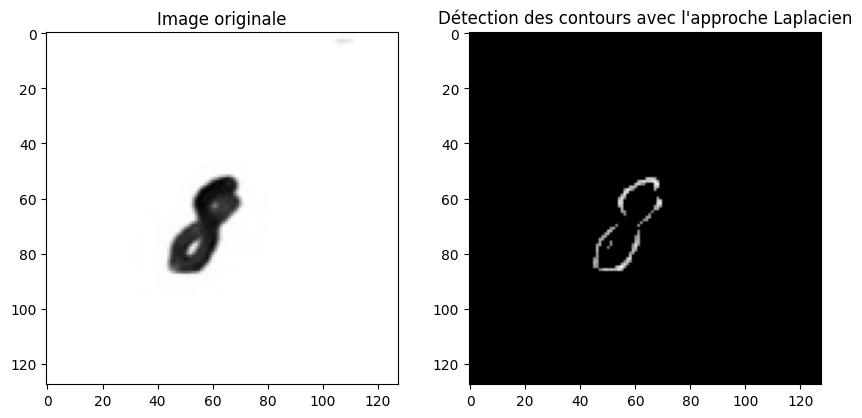

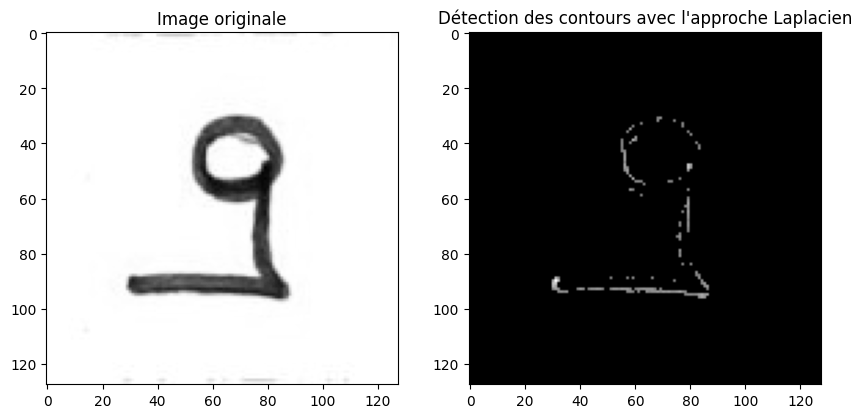

In [ ]:
# Application du filtre de l'approche Laplacien sur notre sélection avec modification des paramètres du Laplacien
i = 1
for title in imgs.keys():
  gray_img = cv2.cvtColor(imgs[title], cv2.COLOR_BGR2GRAY)
  img_smooth = cv2.GaussianBlur(gray_img, (5, 5), 0)

  # Application de l'opérateur Laplacien
  laplacian = cv2.Laplacian(img_smooth, cv2.CV_64F)

  # Seuil de l'image
  threshold = np.max(laplacian)*0.5 # Impact sur la détection
  laplacian[laplacian<threshold] = 0 # Impact sur le bruit

  # Affichage de la détection de contour avec l'approche Laplacien
  fig, ax = plt.subplots(1, 2, figsize=(10,5))
  ax[0].imshow(gray_img, cmap="gray")
  ax[0].set_title("Image originale")
  ax[1].imshow(laplacian, cmap="gray")
  ax[1].set_title("Détection des contours avec l'approche Laplacien")
  plt.show()

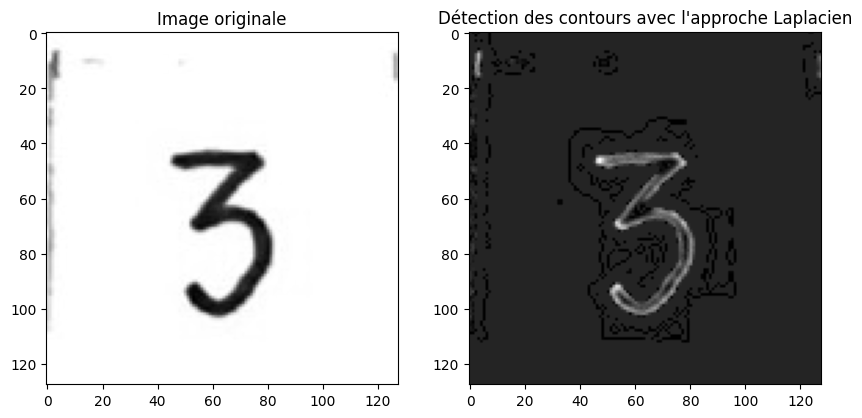

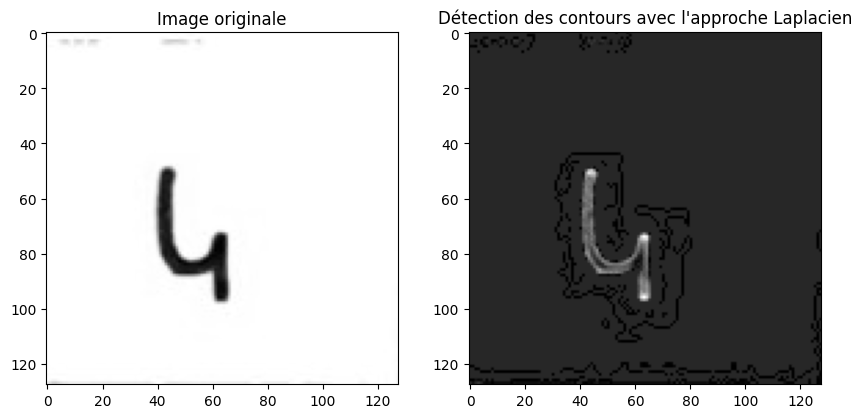

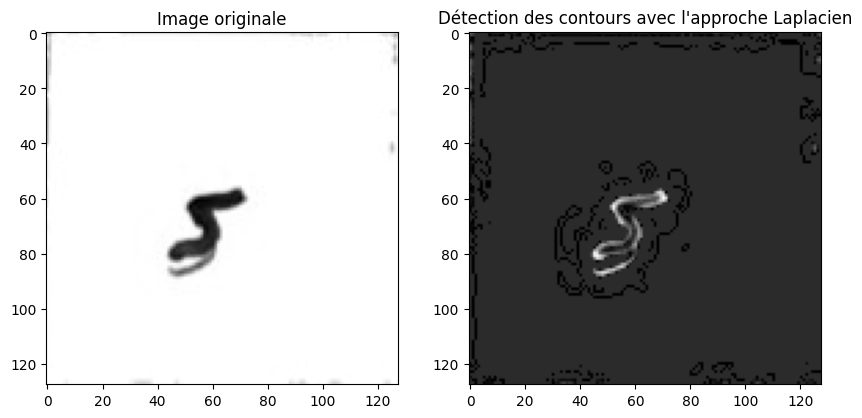

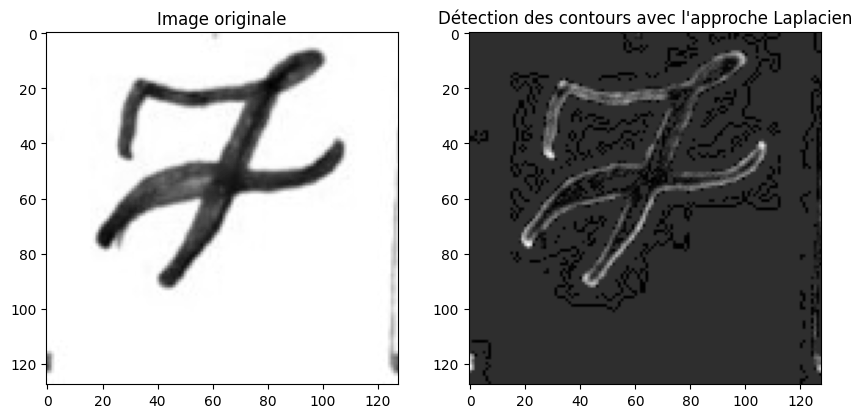

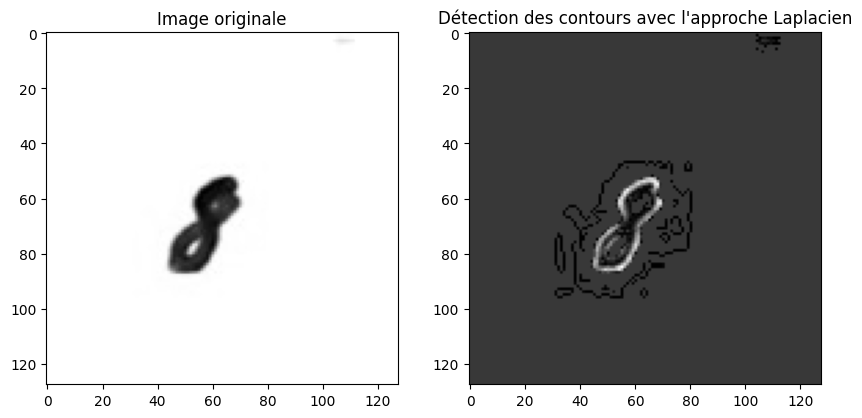

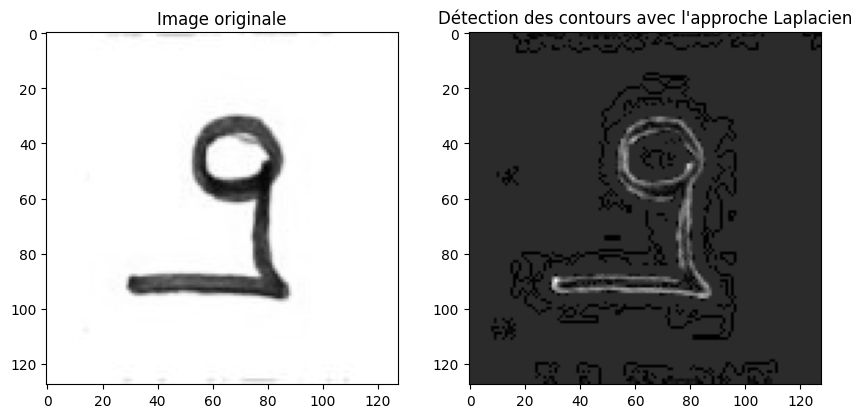

In [ ]:
# Application du filtre de l'approche Laplacien sur notre sélection avec modification des paramètres du Laplacien
i = 1
for title in imgs.keys():
  gray_img = cv2.cvtColor(imgs[title], cv2.COLOR_BGR2GRAY)
  img_smooth = cv2.GaussianBlur(gray_img, (5, 5), 0)

  # Application de l'opérateur Laplacien
  laplacian = cv2.Laplacian(img_smooth, cv2.CV_64F)

  # Seuil de l'image
  threshold = np.max(laplacian)*0.001 # Impact sur la détection
  laplacian[laplacian<threshold] = 10 # Impact sur le bruit

  # Affichage de la détection de contour avec l'approche Laplacien
  fig, ax = plt.subplots(1, 2, figsize=(10,5))
  ax[0].imshow(gray_img, cmap="gray")
  ax[0].set_title("Image originale")
  ax[1].imshow(laplacian, cmap="gray")
  ax[1].set_title("Détection des contours avec l'approche Laplacien")
  plt.show()

Nous remarquons que les détections de contours de la méthode du Gradient avec le fitlre Sobel sont plus nettes que les détections de contours avec l'approche Laplacien. En modifiant le seuil, l'intensité de l'image résultante est plus ou moins importante.

De plus en fonction du masque booléen (`laplacian[laplacian<threshold]`) choisi, toutes les positions où la valeur de l'image est inférieur au seuil donné est considéré comme du bruit.

Nous remarquons que la méthode du Gradient avec le filtre de Sobel rend des contours plus nets que l'approche Laplacien.



Nous nous attendons pour la suite à de meilleurs résultats de reconnaissance de chiffres pour la méthode du Gradient.


##**2) Reconnaissance de chiffres manuscrits**

###**1) Construction du modèle**

In [ ]:
! pip install tensorflow
! pip install tensorflow_datasets

In [ ]:
# Import des librairies nécessaires
import tensorflow as tf
import tensorflow_datasets as tfds
import random as rd

Pour créer notre modèle de reconnaissance de chiffres manuscrits, nous allons utiliser la base MNIST comportant 60 000 exemples d'apprentissage et 10 000 exemples de test.

In [ ]:
# Séparation en ensemble d'apprentissage et de test
(train_set, test_set), info = tfds.load("mnist", split=["train","test"], with_info=True, as_supervised=True)

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
# Fonction permettant de normaliser
def normalise(image, label):
  return tf.cast(image, tf.float32)/255, label

# Normalisation des ensembles d'apprentissage et de test
train_set = train_set.map(normalise)
test_set = test_set.map(normalise)

train_set = train_set.shuffle(info.splits['train'].num_examples)

train_set = train_set.batch(128)
test_set = test_set.batch(128)

In [ ]:
# Fonction permettant d'afficher les images
def show_img(image, label):
  plt.imshow(image, cmap="gray")
  plt.title(f"{label}")
  plt.show()

In [ ]:
# Création du modèle
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(128, activation="sigmoid"),
    tf.keras.layers.Dense(10, activation="softmax")
    ])

# Choix de la méthode de descente du gradient
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Entraînement du modèle
model.fit(train_set, epochs=5, validation_data=test_set)

Epoch 1/5
469/469 [==============================] - 21s 19ms/step - loss: 0.5787 - accuracy: 0.8650 - val_loss: 0.3003 - val_accuracy: 0.9181
Epoch 2/5
469/469 [==============================] - 8s 10ms/step - loss: 0.2705 - accuracy: 0.9239 - val_loss: 0.2298 - val_accuracy: 0.9348
Epoch 3/5
469/469 [==============================] - 5s 6ms/step - loss: 0.2163 - accuracy: 0.9388 - val_loss: 0.1989 - val_accuracy: 0.9409
Epoch 4/5
469/469 [==============================] - 6s 8ms/step - loss: 0.1826 - accuracy: 0.9479 - val_loss: 0.1732 - val_accuracy: 0.9497
Epoch 5/5
469/469 [==============================] - 5s 6ms/step - loss: 0.1580 - accuracy: 0.9553 - val_loss: 0.1530 - val_accuracy: 0.9550


In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


Notre réseau est composé de 3 couches :
- En couche d'entrée, il prend une matrice $M_{28*28}$ tranformée en un vecteur $X_i \in \mathbb{R}^{784}$.
- En deuxième couche, il prend en entrée 128 neurones.
- Et en troisième couche, il rend en sortie un vecteur de 10 neurones :
  - "0" → (1,0,0,0,0,0,0,0,0,0)
  - "1" → (0,1,0,0,0,0,0,0,0,0)
  - ...
  - "9" → (0,0,0,0,0,0,0,0,0,1)

Notre réseau produit la fonction : $f : \mathbb{R}^{784} → \mathbb{R}^{10}$

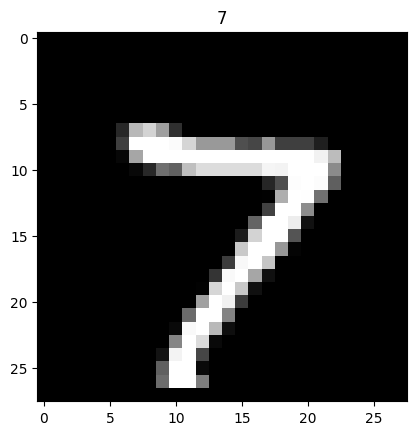

4/4 [==============================] - 0s 3ms/step

La probabilité que le chiffre soit un 7 est de  99.73910450935364 %


In [ ]:
# Application du modèle sur l'ensemble de test
for image, label in test_set.take(1):
  i = rd.randint(0, 10)
  show_img(image[i], label[i])
  print(f"\nLa probabilité que le chiffre soit un {label[i]} est de ", model.predict(image)[0][label[0]]*100,"%")

###**3) Chargement des ensembles de validation**

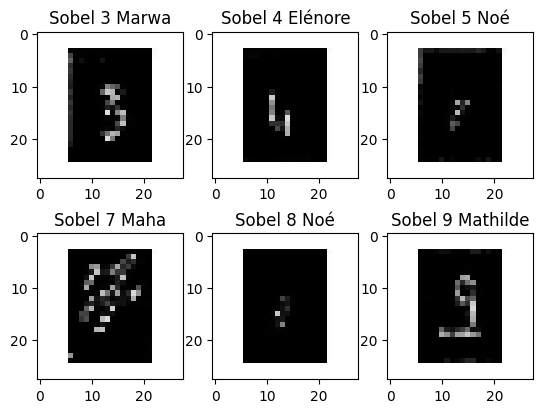

In [ ]:
# Chargement du Sobel validation set
s_marwa_3 = plt.imread("./Handwritten-number-detection/Sobel_Validation_set/marwa_3_sobel.jpg")
s_eleonore_4 = plt.imread("./Handwritten-number-detection/Sobel_Validation_set/eleonore_4_sobel.jpg")
s_noe_5 = plt.imread("./Handwritten-number-detection/Sobel_Validation_set/noe_5_sobel.jpg")
s_maha_7 = plt.imread("./Handwritten-number-detection/Sobel_Validation_set/maha_7_sobel.jpg")
s_noe_8 = plt.imread("./Handwritten-number-detection/Sobel_Validation_set/noe_8_sobel.jpg")
s_mathilde_9 = plt.imread("./Handwritten-number-detection/Sobel_Validation_set/mathilde_9_sobel.jpg")

# Dictionnaire des détections de contours avec la méthode du gradient
sobel_img = {"3 Marwa" : s_marwa_3, "4 Elénore" : s_eleonore_4, "5 Noé" : s_noe_5, "7 Maha" : s_maha_7, "8 Noé" : s_noe_8, "9 Mathilde" : s_mathilde_9}

# Redimension des images en (28, 28, 1) et conversion en noir et blanc
for title in sobel_img.keys():
  sobel_img[title] = cv2.cvtColor(sobel_img[title], cv2.COLOR_RGB2GRAY)
  sobel_img[title] = cv2.resize(sobel_img[title], (28,28))
  sobel_img[title] = np.expand_dims(sobel_img[title], axis=-1)

# Affichage des images
i = 1
for title, img in sobel_img.items():
  plt.subplot(2, 3, i), plt.imshow(img, cmap="gray")
  plt.title(f"Sobel {title}")
  i += 1

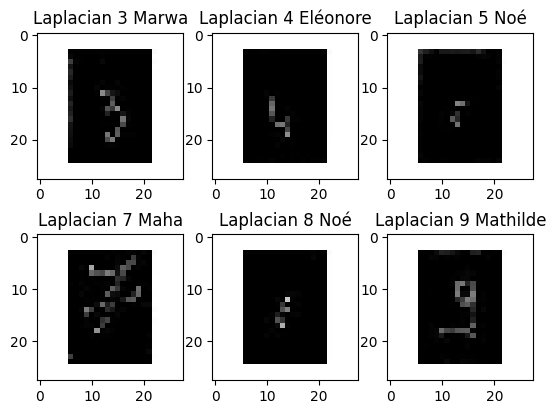

In [ ]:
# Chargement du Laplacian validation set
l_marwa_3 = plt.imread("./Handwritten-number-detection/Laplacian_Validation_Set/marwa_3_laplacian.jpg")
l_eleonore_4 = plt.imread("./Handwritten-number-detection/Laplacian_Validation_Set/eleonore_4_laplacian.jpg")
l_noe_5 = plt.imread("./Handwritten-number-detection/Laplacian_Validation_Set/noe_5_laplacian.jpg")
l_maha_7 = plt.imread("./Handwritten-number-detection/Laplacian_Validation_Set/maha_7_laplacian.jpg")
l_noe_8 = plt.imread("./Handwritten-number-detection/Laplacian_Validation_Set/noe_8_laplacian.jpg")
l_mathilde_9 = plt.imread("./Handwritten-number-detection/Laplacian_Validation_Set/mathilde_9_laplacian.jpg")

# Liste des détections de contours avec l'approche Laplacien
laplacian_img = {"3 Marwa" : l_marwa_3, "4 Eléonore" : l_eleonore_4, "5 Noé" : l_noe_5, "7 Maha" : l_maha_7, "8 Noé" : l_noe_8, "9 Mathilde" : l_mathilde_9}

# # Redimension des images (128, 128 ,3) en (28, 28, 1) et conversion en noir et blanc
for title in laplacian_img.keys():
  laplacian_img[title] = cv2.cvtColor(laplacian_img[title], cv2.COLOR_RGB2GRAY)
  laplacian_img[title] = cv2.resize(laplacian_img[title], (28,28))
  laplacian_img[title] = np.expand_dims(laplacian_img[title], axis=-1)

# # Affichage des images
i = 1
for title, img in laplacian_img.items():
  plt.subplot(2, 3, i), plt.imshow(img, cmap="gray")
  plt.title(f"Laplacian {title}")
  i += 1

###**4) Application du modèle sur notre ensemble de validation**

####**Résultats pour la reconnaissance de chiffres avec les contours détectés avec la méthode du Gradient (filtre Sobel)**



In [ ]:
# Application du modèle sur la détection de contour avec la méthode du gradient
for title in sobel_img.keys():
    # Normalisation des images
    sobel_img[title] = np.reshape(sobel_img[title], (1, 28 * 28))
    sobel_img[title] = sobel_img[title] / 255.0
    print(f"\nDétection de contour pour {title} : ")

    # Probabilités pour chaque classe (chiffre de 0 à 9)
    probabilities = model.predict(sobel_img[title])[0]

    # Afficher les probabilités associées à chaque chiffre
    for digit, prob in enumerate(probabilities):
        print(f"Probabilité que ce soit un {digit}: {np.round(prob*100,2)} %")


Détection de contour pour 3 Marwa : 
1/1 [==============================] - 0s 68ms/step
Probabilité que ce soit un 0: 0.0 %
Probabilité que ce soit un 1: 0.03 %
Probabilité que ce soit un 2: 17.13 %
Probabilité que ce soit un 3: 8.26 %
Probabilité que ce soit un 4: 0.0 %
Probabilité que ce soit un 5: 70.5 %
Probabilité que ce soit un 6: 0.03 %
Probabilité que ce soit un 7: 4.05 %
Probabilité que ce soit un 8: 0.0 %
Probabilité que ce soit un 9: 0.0 %

Détection de contour pour 4 Elénore : 
1/1 [==============================] - 0s 23ms/step
Probabilité que ce soit un 0: 0.0 %
Probabilité que ce soit un 1: 0.02 %
Probabilité que ce soit un 2: 17.16 %
Probabilité que ce soit un 3: 6.21 %
Probabilité que ce soit un 4: 0.0 %
Probabilité que ce soit un 5: 72.98 %
Probabilité que ce soit un 6: 0.03 %
Probabilité que ce soit un 7: 3.58 %
Probabilité que ce soit un 8: 0.0 %
Probabilité que ce soit un 9: 0.0 %

Détection de contour pour 5 Noé : 
1/1 [==============================] - 0s 22ms/

####**Résultats pour la reconnaissance de chiffres avec les contours détectés par l'approche Laplacien**

In [ ]:
# Application du modèle sur la détection de contour avec l'approche Laplacien
for title in laplacian_img.keys():
    # Normalisation des images
    laplacian_img[title] = np.reshape(laplacian_img[title], (1, 28 * 28))
    laplacian_img[title] = laplacian_img[title] / 255.0
    print(f"\nDétection de contour pour {title} : ")

    # Probabilités pour chaque classe (chiffre de 0 à 9)
    probabilities = model.predict(laplacian_img[title])[0]

    # Afficher les probabilités associées à chaque chiffre
    for digit, prob in enumerate(probabilities):
        print(f"Probabilité que ce soit un {digit}: {np.round(prob*100,2)} %")


Détection de contour pour 3 Marwa : 
1/1 [==============================] - 0s 25ms/step
Probabilité que ce soit un 0: 0.0 %
Probabilité que ce soit un 1: 0.03 %
Probabilité que ce soit un 2: 16.53 %
Probabilité que ce soit un 3: 7.14 %
Probabilité que ce soit un 4: 0.0 %
Probabilité que ce soit un 5: 72.69 %
Probabilité que ce soit un 6: 0.03 %
Probabilité que ce soit un 7: 3.58 %
Probabilité que ce soit un 8: 0.0 %
Probabilité que ce soit un 9: 0.0 %

Détection de contour pour 4 Eléonore : 
1/1 [==============================] - 0s 24ms/step
Probabilité que ce soit un 0: 0.0 %
Probabilité que ce soit un 1: 0.02 %
Probabilité que ce soit un 2: 16.7 %
Probabilité que ce soit un 3: 6.53 %
Probabilité que ce soit un 4: 0.0 %
Probabilité que ce soit un 5: 73.25 %
Probabilité que ce soit un 6: 0.03 %
Probabilité que ce soit un 7: 3.46 %
Probabilité que ce soit un 8: 0.0 %
Probabilité que ce soit un 9: 0.0 %

Détection de contour pour 5 Noé : 
1/1 [==============================] - 0s 23ms

#**Conclusion :**
Nous observons que les résultats obtenus avec la détection de contours grâce à la méthode du Gradient et l'approche Laplacien obtiennent des résultats similaires avec notre modèle de reconnaissance de chiffres manuscrits. Nous pensons que cela est dû à la compression des images et aussi à notre choix des chiffres atypiques parmi notre base.
